In [1]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets
from PIL import Image
import seaborn as sns

In [2]:
# Path
path = Path("/kaggle/input/dataeye/Data")
fls = get_image_files(path)

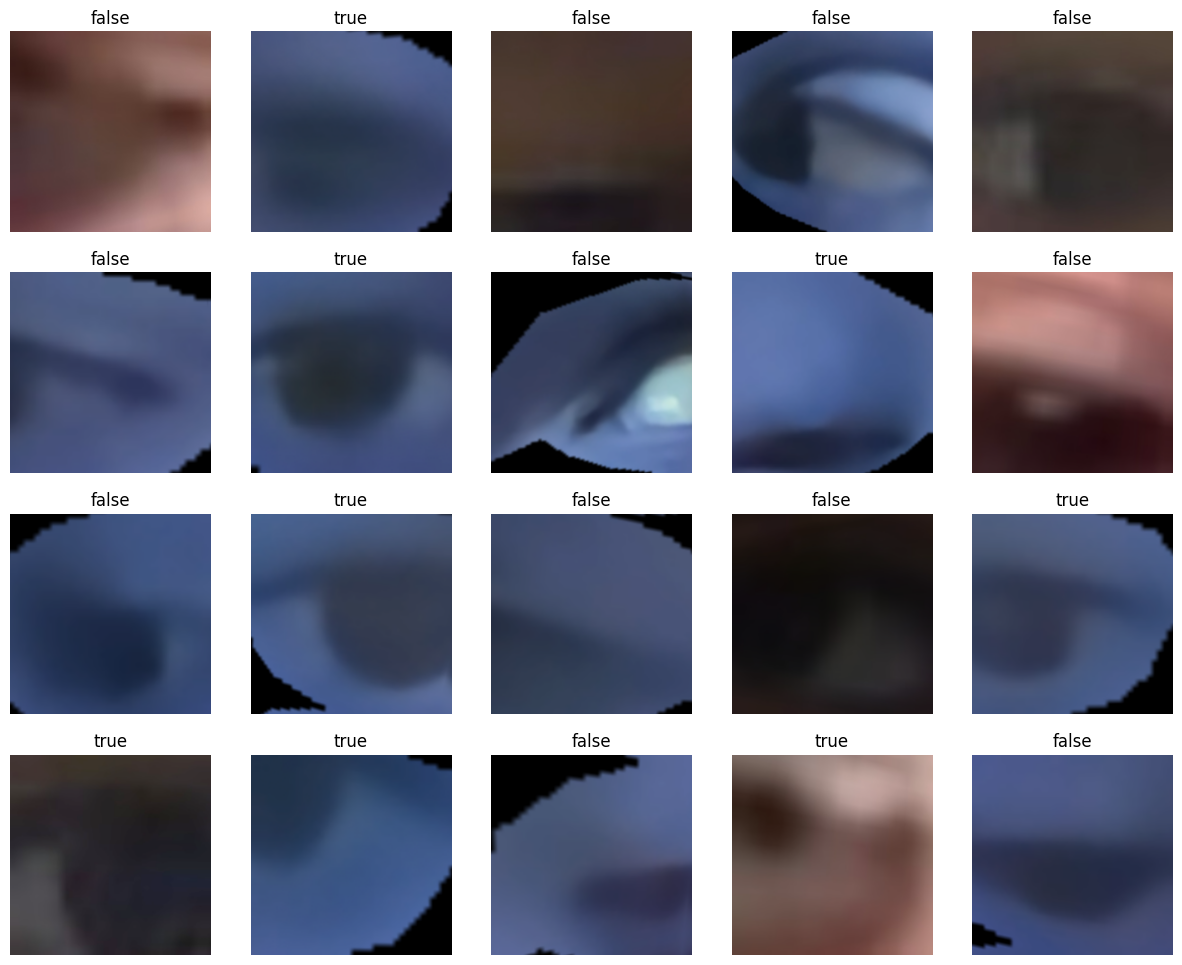

In [5]:
from fastai.vision.augment import aug_transforms

# Define data block with data augmentation
results_augmented = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=30),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

# Data loader with augmentation
dls_augmented = results_augmented.dataloaders(path)

# Check augmented dataset
dls_augmented.train.show_batch(max_n=20, nrows=4)


In [8]:
# Learn & Train
learn = vision_learner(dls_augmented, resnet34, metrics=accuracy)
learn.fine_tune(100)

epoch,train_loss,valid_loss,accuracy,time
0,1.180496,0.884786,0.630928,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.846547,0.581717,0.727835,00:15
1,0.781201,0.488998,0.793814,00:12
2,0.727941,0.435038,0.808247,00:15
3,0.640257,0.436461,0.816495,00:15
4,0.603858,0.390754,0.835052,00:16
5,0.558218,0.361217,0.839175,00:15
6,0.533868,0.348816,0.835052,00:16
7,0.496951,0.343722,0.863918,00:15
8,0.461124,0.370778,0.849485,00:15
9,0.404401,0.294218,0.863918,00:15


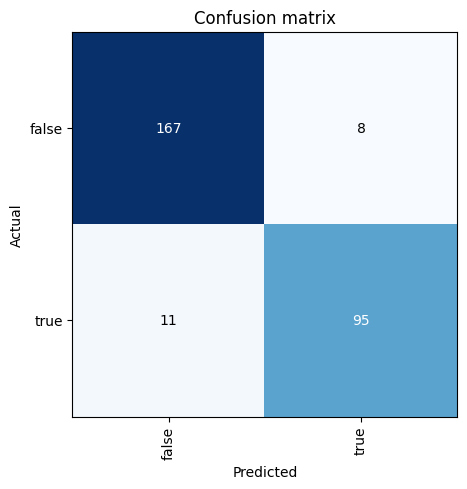

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

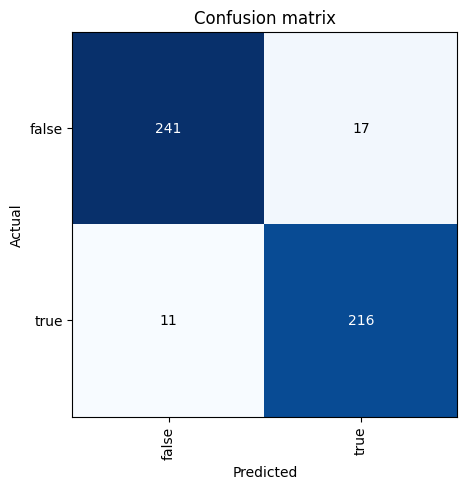

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

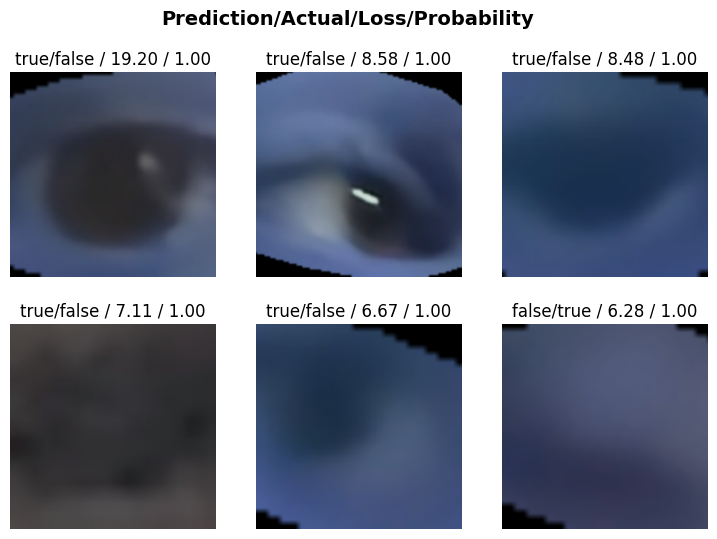

In [12]:
# Top Losses
interp.plot_top_losses(6, nrows=2)

In [15]:
torch.save(learn, 'eyye.pt')